In [22]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import the netflix_titles.csv file as a DataFrame
netflix_df = pd.read_csv("Resources/clean_netflix.csv", encoding="utf-8")
netflix_df

,Movie/TV Show,Title,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,Country 1,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
0,TV Show,3%,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Movie,7:19,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,Mexico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Movie,23:59,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Movie,9,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Movie,21,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7261,Movie,Zozo,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,Sweden,...,United Kingdom,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7262,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",March 2,2019,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,TV Show,Zumbo's Just Desserts,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",October 31,2020,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
netflix_df.columns

Index(['Movie/TV Show', 'Title', 'Date Added to Netflix', 'Release Year',
       'Parental Rating', 'Duration', 'Genre',
       'Calendar Date Added to Netflix', 'Year Added to Netflix', 'Country 1',
       'Country 2', 'Country 3', 'Country 4', 'Country 5', 'Country 6',
       'Country 7', 'Country 8', 'Country 9', 'Country 10', 'Country 11',
       'Country 12'],
      dtype='object')

# How many movies and tv shows have multiple countries involved?

In [25]:
#look at netflix_q1

# Which country produced the most movies and tv shows?

In [26]:
# Import the netflix_q1.csv file as a DataFrame
netflix_q1 = pd.read_csv("Resources/netflix_q1.csv", encoding="utf-8")
netflix_q1

,type,title,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
...,...,...,...,...,...,...,...,...
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7262,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7263,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV"


In [27]:
countrycount = netflix_q1.country.str.get_dummies(sep=', ').sum().sort_values(ascending=False)
countrycount

United States         3287
India                  990
United Kingdom         721
Canada                 412
France                 349
                      ... 
Dominican Republic       1
Samoa                    1
Cyprus                   1
Jamaica                  1
Afghanistan              1
Length: 121, dtype: int64

In [28]:
top_25 = countrycount.head(25)
top_25

United States     3287
India              990
United Kingdom     721
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          142
Egypt              110
Turkey             108
Hong Kong          102
Italy               89
Brazil              88
Belgium             85
Taiwan              85
Argentina           82
Indonesia           80
Philippines         78
Nigeria             76
Thailand            65
South Africa        54
dtype: int64

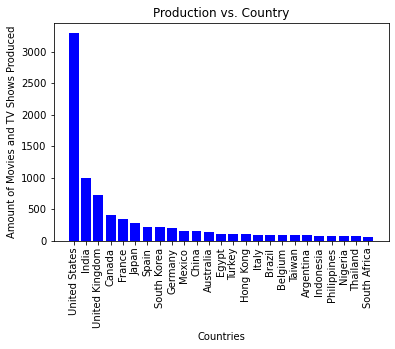

In [29]:
countries = ["United States", "India", "United Kingdom", "Canada", "France", "Japan", "Spain", "South Korea", "Germany",
         "Mexico", "China", "Australia", "Egypt", "Turkey", "Hong Kong", "Italy", "Brazil", "Belgium", "Taiwan", "Argentina",
         "Indonesia", "Philippines", "Nigeria", "Thailand", "South Africa"]
country_production = [3287, 990, 721, 412, 349, 285, 215, 212, 199, 154, 147, 142, 110, 108, 102, 89, 88, 85, 85, 82, 80, 78, 76, 65, 54]
x_axis = np.arange(len(country_production))
plt.bar(x_axis, country_production, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, rotation = 90)
plt.title("Production vs. Country")
plt.xlabel("Countries")
plt.ylabel("Amount of Movies and TV Shows Produced")
plt.show()

# Comparison of US and rest of the world movie and tv show production

Use the above results for this question

# Country of origin vs. when it was added to netflix

In [30]:
countries = netflix_df["Country 1"]
countries

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7260     United States
7261            Sweden
7262             India
7263         Australia
7264    United Kingdom
Name: Country 1, Length: 7265, dtype: object

In [31]:
netflix_df["Year Added to Netflix"] = pd.to_numeric(netflix_df["Year Added to Netflix"])
netflix_df["Year Added to Netflix"] = netflix_df["Year Added to Netflix"].astype(int)
netflix_df.dtypes

Movie/TV Show                     object
Title                             object
Date Added to Netflix             object
Release Year                       int64
Parental Rating                   object
Duration                          object
Genre                             object
Calendar Date Added to Netflix    object
Year Added to Netflix              int64
Country 1                         object
Country 2                         object
Country 3                         object
Country 4                         object
Country 5                         object
Country 6                         object
Country 7                         object
Country 8                         object
Country 9                         object
Country 10                        object
Country 11                        object
Country 12                        object
dtype: object

# Which genre is popular in each country?

In [32]:
genrecount = netflix_q1.listed_in.str.get_dummies(sep=', ').sum().sort_values(ascending=False)
genrecount

International Movies            2342
Dramas                          2061
Comedies                        1429
International TV Shows          1041
Documentaries                    742
Action & Adventure               706
Independent Movies               670
TV Dramas                        622
Romantic Movies                  521
Thrillers                        480
Children & Family Movies         479
TV Comedies                      462
Crime TV Shows                   395
Kids' TV                         342
Docuseries                       313
Horror Movies                    306
Stand-Up Comedy                  300
Music & Musicals                 298
Romantic TV Shows                281
British TV Shows                 219
Sci-Fi & Fantasy                 217
Reality TV                       189
Sports Movies                    187
TV Action & Adventure            140
Anime Series                     136
Korean TV Shows                  135
Spanish-Language TV Shows        131
C

In [33]:
genrecount.head(25)

International Movies        2342
Dramas                      2061
Comedies                    1429
International TV Shows      1041
Documentaries                742
Action & Adventure           706
Independent Movies           670
TV Dramas                    622
Romantic Movies              521
Thrillers                    480
Children & Family Movies     479
TV Comedies                  462
Crime TV Shows               395
Kids' TV                     342
Docuseries                   313
Horror Movies                306
Stand-Up Comedy              300
Music & Musicals             298
Romantic TV Shows            281
British TV Shows             219
Sci-Fi & Fantasy             217
Reality TV                   189
Sports Movies                187
TV Action & Adventure        140
Anime Series                 136
dtype: int64

In [38]:
year = netflix_df.loc[netflix_df["Year Added to Netflix"] == "2010"]
year

,Movie/TV Show,Title,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,Country 1,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
